# Deep Q Network 

In this tutorial we show a naive use of CAPOIRL library to solve the Cart Pole problem throug Reinforcement Learning (RL). 

We use the Deep Q Network (DQN) agent in the easiest and simple form allowed, consisting of four main steps in four code lines:

- Create the environment
- Define the agent
- Build a RL Problem given an environment and an agent
- Solve the RL Problem

In [1]:
from RL_Problem import rl_problem
from RL_Agent import dqn_agent
from RL_Problem.base.ValueBased import dqn_problem
from RL_Agent.base.utils import agent_saver, history_utils

import gym

2021-11-29 14:41:12.824931: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-11-29 14:41:13.016287: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2799925000 Hz
2021-11-29 14:41:13.017541: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564404e42c50 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-11-29 14:41:13.017601: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-11-29 14:41:13.038892: I tensorflow/core/common_runtime/process_util.cc:147] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/home/serch/anaconda3/envs/capoir/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
 

The next cell defined the environment. We use the CartPole environment the Gym library from OpenAI, this is a discrete environment were the posibles actions are: 1) move the cart to the left, move the cart to the rigth. The forces needed to move the cart are automaticatly calculated by the environment. The reward function provides a value of +1 every time step the car is upritgh. An episode ends when the pole is too far from the vertical, go outside of the screem or after 500 timesteps.

Our library is compatible with all Gym environments and use a compatible interfaz based in Gym's one, for defining your own envirinments. 

In [2]:
environment = gym.make("CartPole-v1")

Here we define the RL agent that we are going to use. In this case, we selected a DQN agent because it works very well in problems with discrete action spaces. DQN is an adaptation of Q-Learning for using neural networks and is one of the very first methods used to introduce the Reinforcement Learning paradigm. 

The agent is defined in the naivest way that this library allows where we only needs to configure a few parameters. The parameters used for this example are:

* learning_rate: learning rate for training the neural network.
* batch_size: Size of the batches used for training the neural network. 
* epsilon: Determines the amount of exploration (float between [0, 1]). 0 -> Full Exploitation; 1 -> Full exploration.
* epsilon_decay: Decay factor of the epsilon. In each iteration we calculate the new epslon value as: epsilon' = epsilon * epsilon_decay.
* esilon_min: minimun value epsilon can reach during the training procedure.

In [3]:
agent = dqn_agent.Agent(learning_rate=1e-3, batch_size=128, epsilon=0.4, epsilon_decay=0.999, epsilon_min=0.15)

We need to create a RL problem were the comunications between agent and environment are managed.

There are a specific problem definition for each agent that respond to the specific requeriments of each algorithm. We provides a function that automaticaly select the correct problem given a an agent from the library. This function can be imported as "from RL_Problem.rl_problem import Problem" and recieves the environment and the agent as inputs.

In [4]:
problem = dqn_problem.DQNProblem(environment, agent)

Next step is solving the RL problem that we have define. Here we specify the number of iteration, which conrrespond with the number of episodes that wil be executed; we also especify if we want to render the environment during the training process and the verbosity of the function. Render the environment in training mode allows us to se how the agent is learning to perform better and better but with this specific environment may make longer the training process.

In [5]:
problem.solve(30, render=False, verbose=1)

Episode:  1 Epochs:  23  Reward: 23.0 Smooth Reward: 23.0  Epsilon: 0.4000
Episode:  2 Epochs:  40  Reward: 40.0 Smooth Reward: 31.5  Epsilon: 0.4000
Episode:  3 Epochs:  17  Reward: 17.0 Smooth Reward: 26.7  Epsilon: 0.4000
Episode:  4 Epochs:  97  Reward: 97.0 Smooth Reward: 44.2  Epsilon: 0.3809
Episode:  5 Epochs:  10  Reward: 10.0 Smooth Reward: 37.4  Epsilon: 0.3771
Episode:  6 Epochs:  9  Reward: 9.0 Smooth Reward: 32.7  Epsilon: 0.3737
Episode:  7 Epochs:  10  Reward: 10.0 Smooth Reward: 29.4  Epsilon: 0.3700
Episode:  8 Epochs:  13  Reward: 13.0 Smooth Reward: 27.4  Epsilon: 0.3652
Episode:  9 Epochs:  10  Reward: 10.0 Smooth Reward: 25.4  Epsilon: 0.3616
Episode:  10 Epochs:  12  Reward: 12.0 Smooth Reward: 24.1  Epsilon: 0.3572
Episode:  11 Epochs:  10  Reward: 10.0 Smooth Reward: 22.8  Epsilon: 0.3537
Episode:  12 Epochs:  11  Reward: 11.0 Smooth Reward: 19.9  Epsilon: 0.3498
Episode:  13 Epochs:  28  Reward: 28.0 Smooth Reward: 21.0  Epsilon: 0.3401
Episode:  14 Epochs:  3

The next cell run n iterations in fully explorative mode to check the performance obtained by the agent. It will be rendered by default.

In [6]:
problem.test(n_iter=10, verbose=1)

Test episode:  1 Epochs:  199  Reward: 199.0 Smooth Reward: 199.0  Epsilon: 0.1499
Test episode:  2 Epochs:  157  Reward: 157.0 Smooth Reward: 178.0  Epsilon: 0.1499
Test episode:  3 Epochs:  133  Reward: 133.0 Smooth Reward: 163.0  Epsilon: 0.1499
Test episode:  4 Epochs:  156  Reward: 156.0 Smooth Reward: 161.2  Epsilon: 0.1499
Test episode:  5 Epochs:  139  Reward: 139.0 Smooth Reward: 156.8  Epsilon: 0.1499
Test episode:  6 Epochs:  154  Reward: 154.0 Smooth Reward: 156.3  Epsilon: 0.1499
Test episode:  7 Epochs:  212  Reward: 212.0 Smooth Reward: 164.3  Epsilon: 0.1499
Test episode:  8 Epochs:  157  Reward: 157.0 Smooth Reward: 163.4  Epsilon: 0.1499
Test episode:  9 Epochs:  156  Reward: 156.0 Smooth Reward: 162.6  Epsilon: 0.1499
Test episode:  10 Epochs:  201  Reward: 201.0 Smooth Reward: 166.4  Epsilon: 0.1499


Here we show the history of rewards obtained during the epochs of the training process. Param n_moving_average select how much time states will be use to calculate a smothed versión of the data (blue line)

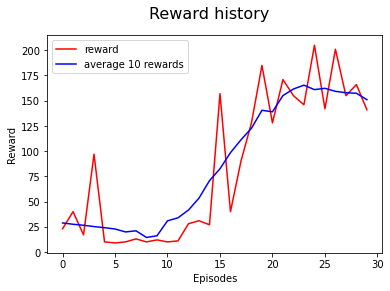

In [7]:
hist = problem.get_histogram_metrics()
history_utils.plot_reward_hist(hist, n_moving_average=10)

Run this last cell if you want to save the agent to a file.

In [ ]:
agent_saver.save(agent, 'agent_dqn_lunar.json')